# Summarizing NetCDF-4 compatibility

In the last step, we ran a compatibility check to see if the variables in NetCDF-4 collections in NASA CMR are compatible with TiTiler-CMR. In this notebook, we summarize the results.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_read = pd.read_csv("output/compatibility_report_netcdf4_2025-10-06_10-04-53.csv")

In [3]:
concept_id_to_find = "C3177839243-NSIDC_CPRD"

matching_rows = df_read[df_read["concept_id"] == concept_id_to_find]
matching_rows

,concept_id,short_name,entry_title,provider_id,begin_time,end_time,west,south,east,north,links,variables,status,error,scheme,compatible,compat_error,status_code
75,C3177839243-NSIDC_CPRD,NSIDC-0630,MEaSUREs Calibrated Enhanced-Resolution Passiv...,NSIDC_CPRD,1978-10-25T00:00:00.000Z,NaN,-180.0,-90.0,180.0,90.0,https://data.nsidc.earthdatacloud.nasa.gov/nsi...,"['crs', 'TB', 'TB_num_samples', 'Incidence_ang...",ok,NaN,https,True,NaN,NaN


In [4]:
incompatible_collections = df_read[~df_read["compatible"]]
incompatible_collections.head()

,concept_id,short_name,entry_title,provider_id,begin_time,end_time,west,south,east,north,links,variables,status,error,scheme,compatible,compat_error,status_code
0,C2105092163-LAADS,VNP03IMG,VIIRS/NPP Imagery Resolution Terrain Corrected...,LAADS,2012-01-19T00:00:00.000Z,NaN,-180.0,-90.0,180.0,90.0,https://data.laadsdaac.earthdatacloud.nasa.gov...,[],ok,NaN,https,False,No variable found,NaN
1,C2105091501-LAADS,VNP02IMG,VIIRS/NPP Imagery Resolution 6-Min L1B Swath 3...,LAADS,2012-01-19T00:00:00.000Z,NaN,-180.0,-90.0,180.0,90.0,https://data.laadsdaac.earthdatacloud.nasa.gov...,[],ok,NaN,https,False,No variable found,NaN
2,C1562021084-LAADS,CLDMSK_L2_VIIRS_SNPP,VIIRS/Suomi-NPP Cloud Mask 6-Min Swath 750 m,LAADS,2012-03-01T00:00:00.000Z,NaN,-180.0,-90.0,180.0,90.0,https://data.laadsdaac.earthdatacloud.nasa.gov...,[],ok,NaN,https,False,No variable found,NaN
3,C1964798938-LAADS,CLDMSK_L2_VIIRS_NOAA20,VIIRS/NOAA20 Cloud Mask and Spectral Test Resu...,LAADS,2012-03-01T00:00:00.000Z,NaN,-180.0,-90.0,180.0,90.0,https://data.laadsdaac.earthdatacloud.nasa.gov...,[],ok,NaN,https,False,No variable found,NaN
4,C1593392869-LAADS,CLDMSK_L2_MODIS_Aqua,MODIS/Aqua Cloud Mask 5-Min Swath 1000 m,LAADS,2002-07-04T00:00:00.000Z,NaN,-180.0,-90.0,180.0,90.0,https://data.laadsdaac.earthdatacloud.nasa.gov...,[],ok,NaN,https,False,No variable found,NaN


In [5]:
df_read["status_code"].unique()

array([ nan, 400., 500., 504.])

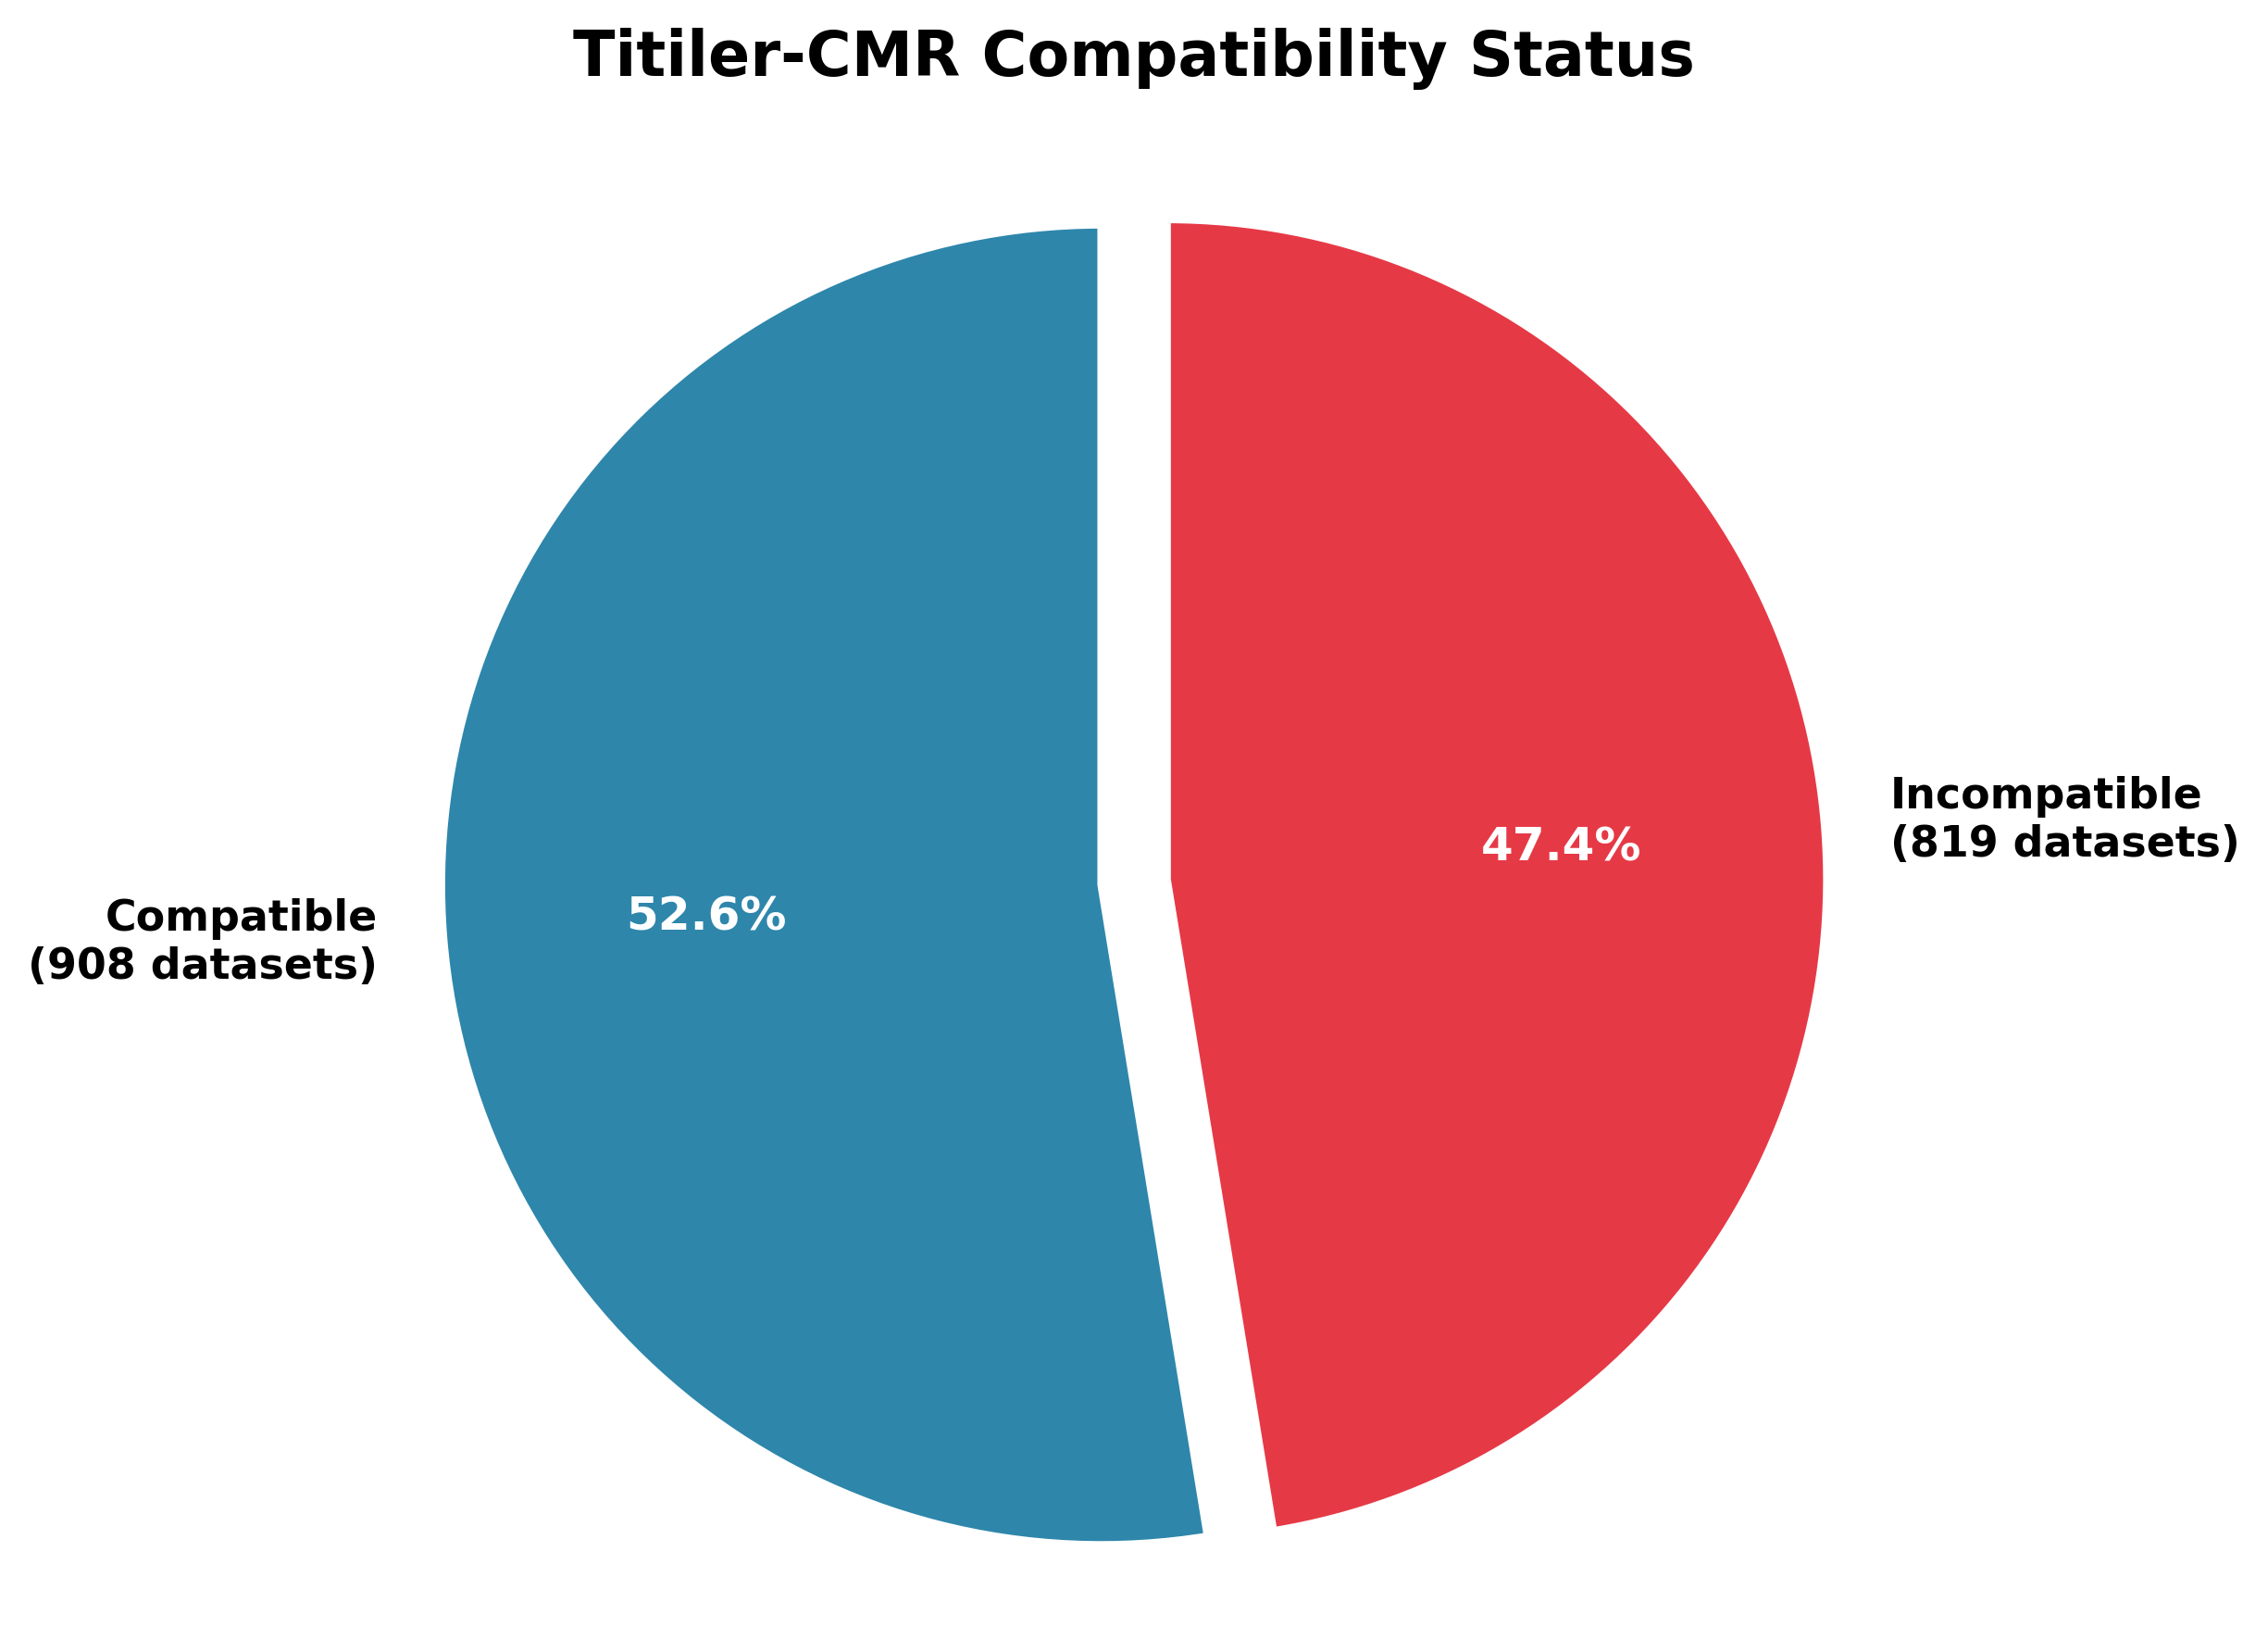


Compatibility Summary:
compatible
True     908
False    819
Name: count, dtype: int64


In [6]:
compatibility_counts = df_read["compatible"].value_counts()

colors = ["#2E86AB", "#E63946"]  # Blue and Red-Orange

plt.figure(figsize=(8, 6), dpi=300)

# Create labels
labels = [
    f"{'Compatible' if x else 'Incompatible'}\n({compatibility_counts[x]} datasets)"
    for x in compatibility_counts.index
]

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    compatibility_counts.values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=(0.05, 0.05),
    textprops={"fontsize": 11, "weight": "bold"},
    wedgeprops={"edgecolor": "white", "linewidth": 2},
)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(12)
    autotext.set_weight("bold")

plt.title("Titiler-CMR Compatibility Status", fontsize=16, fontweight="bold", pad=20)

plt.axis("equal")

plt.tight_layout()
plt.show()

print("\nCompatibility Summary:")
print(compatibility_counts)

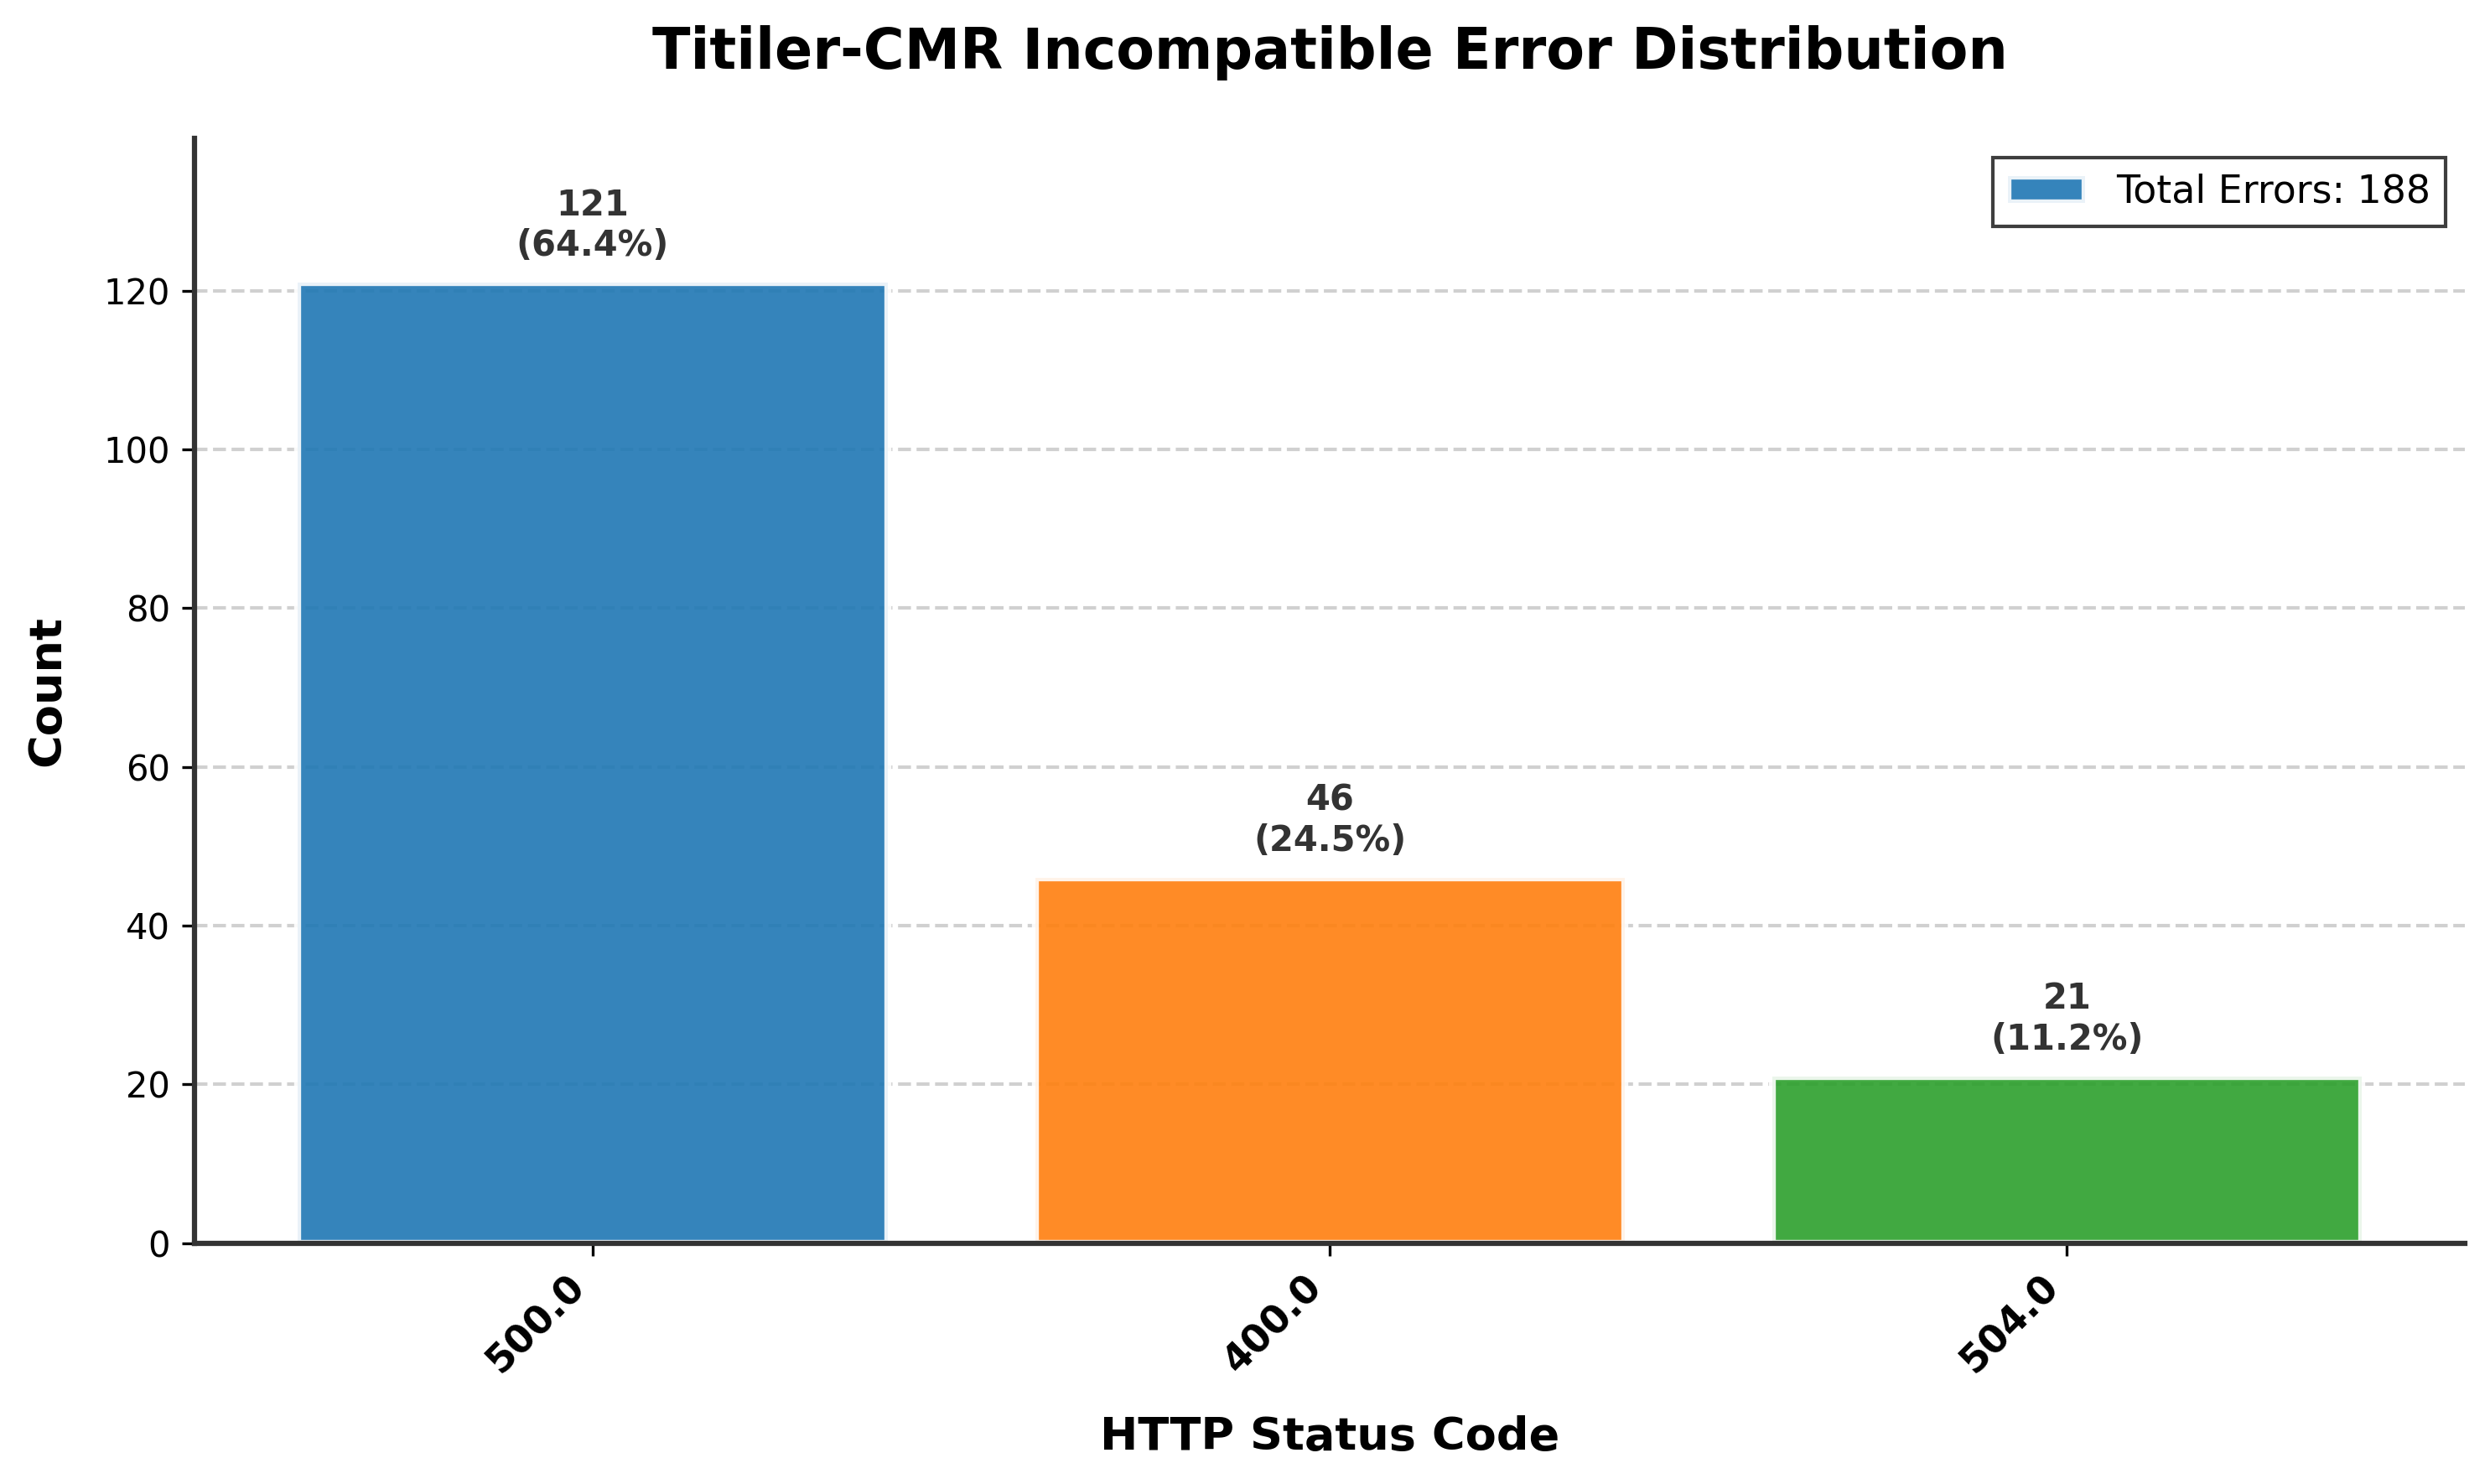


Error Distribution:
status_code
500.0    121
400.0     46
504.0     21
Name: count, dtype: int64

Total Errors: 188


In [7]:
error_df = df_read[df_read["status_code"].notna()]
status_counts = error_df["status_code"].value_counts()
total_errors = sum(status_counts.values)

colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

fig, ax = plt.subplots(figsize=(10, 6), dpi=300, facecolor="white")

bars = ax.bar(
    range(len(status_counts)),
    status_counts.values,
    color=[colors[i % len(colors)] for i in range(len(status_counts))],
    edgecolor="white",
    linewidth=2,
    alpha=0.9,
)

ax.set_xticks(range(len(status_counts)))
ax.set_xticklabels(
    status_counts.index, rotation=45, ha="right", fontsize=11, fontweight="bold"
)

ax.set_ylabel("Count", fontsize=13, fontweight="bold", labelpad=10)
ax.set_xlabel("HTTP Status Code", fontsize=13, fontweight="bold", labelpad=10)

ax.set_title(
    "Titiler-CMR Incompatible Error Distribution",
    fontsize=16,
    fontweight="bold",
    pad=20,
)

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

for spine in ["left", "bottom"]:
    ax.spines[spine].set_edgecolor("#333333")
    ax.spines[spine].set_linewidth(1.5)

ax.grid(axis="y", alpha=0.3, linestyle="--", linewidth=1, color="#666666")
ax.set_axisbelow(True)

legend = ax.legend(
    [f"Total Errors: {total_errors}"],
    loc="upper right",
    fontsize=11,
    frameon=True,
    shadow=False,
    fancybox=False,
    edgecolor="#333333",
    facecolor="white",
    framealpha=0.95,
)

for i, (bar, v) in enumerate(zip(bars, status_counts.values)):
    height = bar.get_height()
    percentage = (v / total_errors) * 100

    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + max(status_counts.values) * 0.02,
        f"{v}\n({percentage:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="#333333",
    )

ax.set_ylim(0, max(status_counts.values) * 1.15)

plt.tight_layout()
plt.show()

print("\nError Distribution:")
print(status_counts)
print(f"\nTotal Errors: {total_errors}")